# Dataset is for concrete features and purpose is to find best features combination to imporve model and decrease features needed at the same time

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
## get basic information about dataset
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


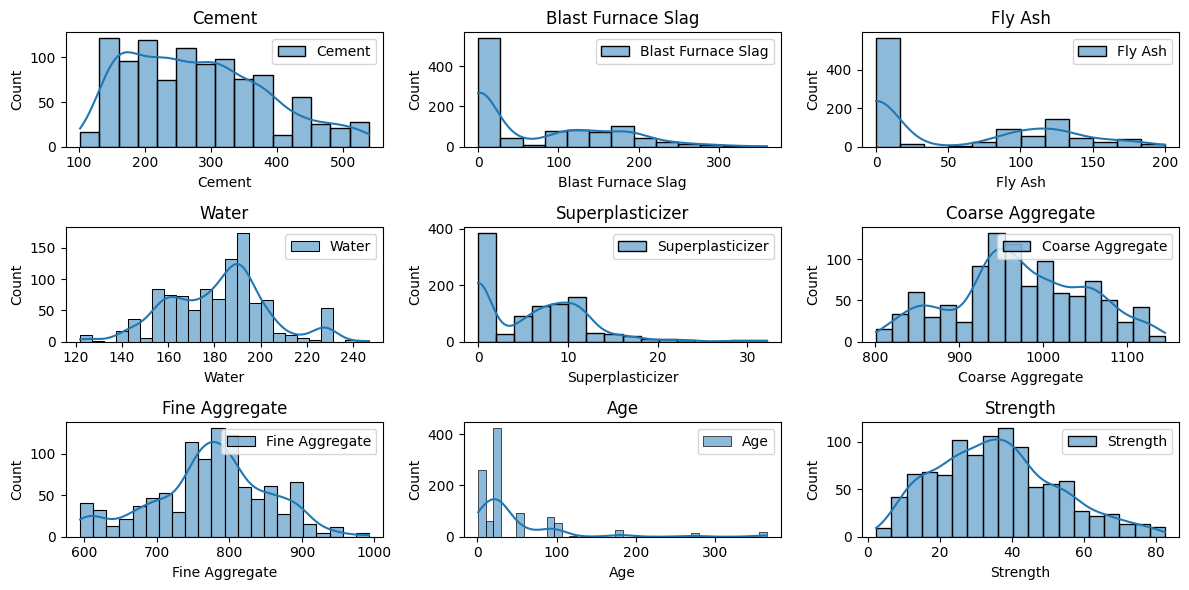

In [4]:
# check distribution for features to know which scaler could be use in this case we use MinMaxScaler
fig,ax = plt.subplots(3,3, figsize=(12,6))
cols = df.columns
ax = ax.flatten()
for i, col in enumerate(cols):
    sns.histplot(df[col], label=col, ax=ax[i], kde=True)
    ax[i].set_title(col)
    ax[i].legend()
    
plt.tight_layout()

## Using ML pacakge to find best K feartures

In [5]:
x = df.drop('Strength',axis=1)
y = df['Strength']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.2)
print(xtrain.shape,xtest.shape)

(824, 8) (206, 8)


In [8]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Iterate feature numbers from 1 to 8 to check thier r2 and MSE respectively
r2 = []
MSE =[]
for x in range(1,9):
    selector = SelectKBest(score_func=f_regression, k=x)
    selector.fit(xtrain,ytrain)
    selected_train_x = selector.transform(xtrain)
    selected_test_x = selector.transform(xtest)

    lr = LinearRegression()
    lr.fit(selected_train_x,ytrain)
    ypredict = lr.predict(selected_test_x)

    msr = mean_squared_error(ytest, ypredict)
    r2score = r2_score(ytest, ypredict)
    MSE.append(msr)
    r2.append(r2score)

In [10]:
print(r2)
print(MSE)

[0.25183513628298093, 0.3713871393562699, 0.5332485309007671, 0.5561498852873195, 0.5500728984898495, 0.6343167438815538, 0.5984982455408248, 0.6275531792314848]
[192.78479855432548, 161.9790096874915, 120.27106899698714, 114.36991912194752, 115.93581820700624, 94.22812575725183, 103.45772517044708, 95.97094009110688]


In [11]:
# check adjusted R2 respectively
adjr2=[]
def adjusted_r_squared(r_squared, n, k):
    adj_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
    return adj_r_squared

for col in range(1, 9):  # Iterating from 1 to 8
    r2score = r2[col - 1]  # Assuming R-squared scores are 0-indexed in the list 'r2'
    adjr2.append(adjusted_r_squared(r2score, 1030, col))

In [12]:
adjr2

[0.25110734945057145,
 0.3701629663073045,
 0.531883760523284,
 0.5544177872786846,
 0.547875988814507,
 0.632171974050947,
 0.5957482335239811,
 0.6246348887651301]

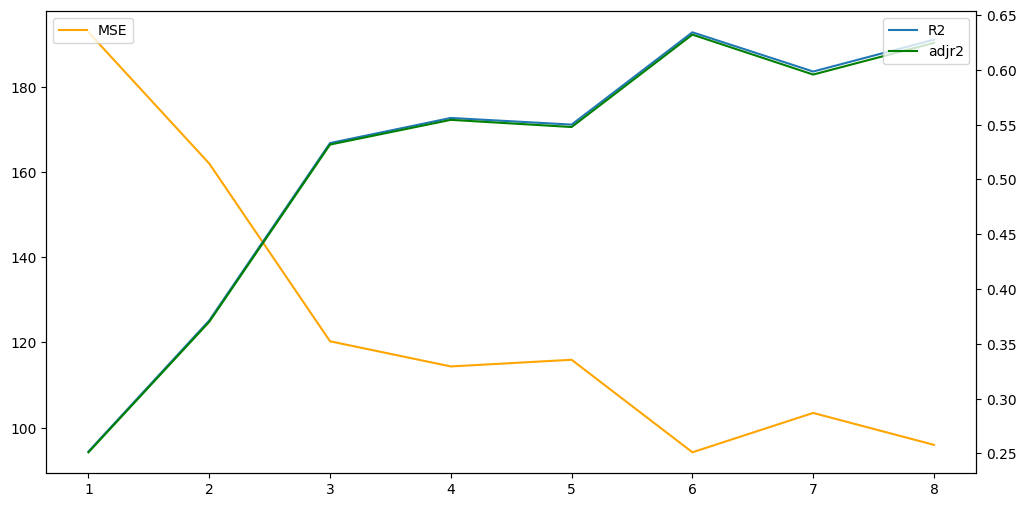

In [13]:
# Plot MSE and R2 and Adjusted R2 together
axisx = range(1,9)
y1 = r2
y2 = MSE
y3 = adjr2
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x=axisx, y=y2,color='orange',label='MSE')
ax2 = ax.twinx()
sns.lineplot(x=axisx,ax=ax2, y=y1,label='R2')
sns.lineplot(x=axisx,ax=ax2, y=y3,label='adjr2',color='green')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

## First conlusion: Both r2 and MSE have biggest turning point at features=3 so selecting 3 features could be the optimal choice
## Second conlusion: r2 and adjusted r2 don't change a lot in this case

In [14]:
selector = SelectKBest(k=3,score_func=f_regression)
selector.fit(xtrain,ytrain)
mask = selector.get_support()

In [15]:
cols = df.drop('Strength',axis=1).columns
cols[mask]

Index(['Cement', 'Superplasticizer', 'Age'], dtype='object')

In [16]:
# find out best 3 feature names
selector.get_feature_names_out()

array(['Cement', 'Superplasticizer', 'Age'], dtype=object)

<Axes: >

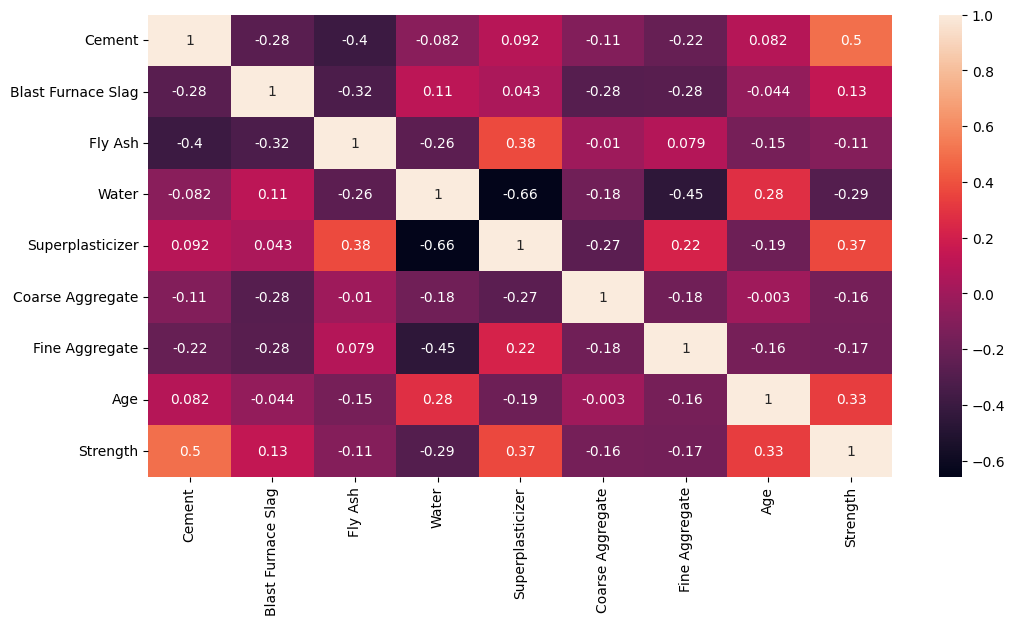

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

## Check if adding scaler and have cross validation could better the result

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, make_scorer

In [19]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [20]:
lr = LinearRegression()
scaler = MinMaxScaler()
pipe = Pipeline([
    ('scaler',MinMaxScaler()),
    ('BestK',SelectKBest()),
    ('lrmodel',LinearRegression())
])
param_grid = {'BestK__k':range(1,9)}
gridcv = GridSearchCV(pipe,param_grid,cv=10,scoring=scorer)

In [21]:
gridcv.fit(xtrain,ytrain)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('BestK', SelectKBest()),
                                       ('lrmodel', LinearRegression())]),
             param_grid={'BestK__k': range(1, 9)},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [22]:
results_df = pd.DataFrame(gridcv.cv_results_)

In [23]:
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_BestK__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034698,0.005413,0.001949,0.000580,1,{'BestK__k': 1},-294.832396,-315.685451,-354.762855,-247.733749,-288.892847,-292.078767,-284.292538,-243.829825,-237.135333,-227.396145,-278.663991,37.765632,8
1,0.032675,0.005009,0.001618,0.000429,2,{'BestK__k': 2},-282.239581,-290.544010,-252.444120,-207.679283,-206.958993,-236.185193,-199.224788,-160.623455,-232.380770,-187.895413,-225.617561,39.130901,7
2,0.029291,0.002212,0.001479,0.000503,3,{'BestK__k': 3},-233.543897,-282.221094,-195.346903,-191.387189,-184.864613,-168.699311,-168.429121,-133.484835,-192.042065,-158.793949,-190.881298,39.421940,6
3,0.032691,0.005433,0.001631,0.000550,4,{'BestK__k': 4},-232.394465,-217.734180,-192.623250,-198.291143,-184.227122,-156.317392,-166.747327,-131.909635,-185.746791,-160.767673,-182.675898,28.392456,5
4,0.030827,0.003182,0.001402,0.000489,5,{'BestK__k': 5},-214.024809,-202.151377,-185.181120,-176.054130,-148.447875,-158.429466,-152.895561,-140.897760,-170.628728,-165.832172,-171.454300,22.301353,4
5,0.034566,0.002542,0.001768,0.000551,6,{'BestK__k': 6},-192.021538,-167.261937,-168.901800,-176.022590,-148.252424,-144.198580,-124.105867,-144.470579,-168.236364,-166.423164,-159.989484,18.548358,3
6,0.033294,0.004323,0.001808,0.000563,7,{'BestK__k': 7},-196.553761,-167.134686,-168.587890,-176.092201,-148.148699,-128.917936,-124.236815,-144.930914,-168.747834,-167.064267,-159.041500,21.094227,2
7,0.052209,0.018004,0.002298,0.000337,8,{'BestK__k': 8},-147.250169,-135.228974,-152.220338,-123.428369,-96.363450,-82.272892,-93.809822,-102.649517,-106.652977,-105.524292,-114.540080,22.545432,1


<Axes: xlabel='param_BestK__k', ylabel='mean_test_score'>

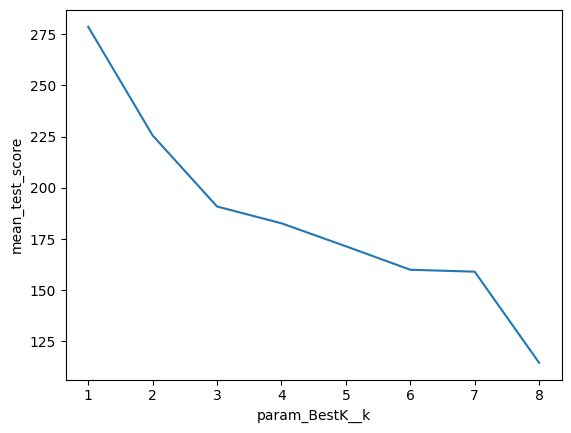

In [24]:
sns.lineplot(results_df, x='param_BestK__k', y=-results_df.mean_test_score)

In [25]:
# Remove scaler to check the result in case of having CV
lr = LinearRegression()
scaler = MinMaxScaler()
pipe1 = Pipeline([
    ('BestK',SelectKBest()),
    ('lrmodel',LinearRegression())
])
param_grid = {'BestK__k':range(1,9)}
gridcv1 = GridSearchCV(pipe1,param_grid,cv=5,scoring=scorer)

In [26]:
gridcv1.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('BestK', SelectKBest()),
                                       ('lrmodel', LinearRegression())]),
             param_grid={'BestK__k': range(1, 9)},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [27]:
results_df1 = pd.DataFrame(gridcv1.cv_results_)
results_df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_BestK__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032561,0.004341,0.001182,0.000530,1,{'BestK__k': 1},-306.979007,-299.191880,-288.109548,-266.360445,-207.694422,-273.667060,35.708719,8
1,0.026381,0.001024,0.001076,0.000183,2,{'BestK__k': 2},-287.991392,-229.500730,-221.846678,-196.610579,-212.977753,-229.785426,31.093754,7
2,0.029722,0.002719,0.001691,0.000545,3,{'BestK__k': 3},-283.606424,-196.398664,-174.201002,-154.656555,-177.752467,-197.323023,45.130348,6
3,0.030921,0.005607,0.001212,0.000443,4,{'BestK__k': 4},-224.999142,-197.591855,-173.462145,-153.346023,-169.136866,-183.707206,25.047415,5
4,0.030319,0.003041,0.001420,0.000489,5,{'BestK__k': 5},-207.694228,-162.093021,-174.801009,-150.311730,-169.254357,-172.830869,19.258970,4
5,0.032285,0.004358,0.001225,0.000389,6,{'BestK__k': 6},-178.682667,-144.051853,-151.481317,-136.218221,-169.407722,-155.968356,15.803550,3
6,0.030909,0.004114,0.001091,0.000134,7,{'BestK__k': 7},-181.179123,-143.539802,-136.625704,-136.156462,-170.225295,-153.545277,18.604326,2
7,0.029712,0.002808,0.001418,0.000377,8,{'BestK__k': 8},-139.222962,-142.354592,-87.806116,-97.064828,-107.499000,-114.789500,22.146091,1


<Axes: xlabel='param_BestK__k', ylabel='mean_test_score'>

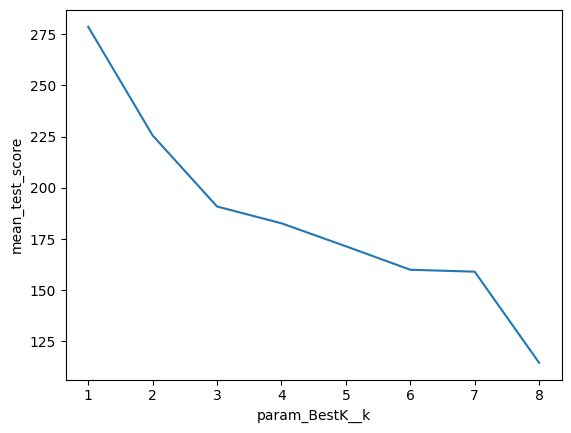

In [28]:
sns.lineplot(results_df1, x='param_BestK__k', y=-results_df.mean_test_score)

## Third conclusion: After scaling we see at features=3 there is big turning point also and next is at 7 features to keep resource spent selecting features =3 is still ideal and different CV number doesn't change result too much.